<a href="https://colab.research.google.com/github/MuhammadJundullah/Data-Analytics/blob/main/Car%20sales%20analysis/Second_Car_Analytics_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [74]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Car_details/Car_details.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
1,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


# menghapus string format data untuk kebutuhan analisis

In [78]:
df['max_power'] = df['max_power'].str.replace(' bhp','')
df['max_power'] = df['max_power'].replace('', np.nan)
df['max_power'] = df['max_power'].astype('float')

In [118]:
df['engine'] = df['engine'].str.replace(' CC', '')
df['max_power'] = df['max_power'].astype('int')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498,103,5.0
1,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497,78,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396,90,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298,88,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,1197,81,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8120,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,998,67,5.0
8121,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,1396,88,5.0
8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,1197,82,5.0
8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,1493,110,5.0


# menghapus kolom yang tidak diperlukan

In [79]:
df.drop(columns=['mileage'], inplace=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats
0,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
1,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90.00,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,1197 CC,81.86,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,1197 CC,82.85,113.7Nm@ 4000rpm,5.0
8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,1493 CC,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,1248 CC,73.90,190Nm@ 2000rpm,5.0
8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,1396 CC,70.00,140Nm@ 1800-3000rpm,5.0


In [81]:
df.drop(columns=['torque'], inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8127 entries, 0 to 8126
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8127 non-null   object 
 1   year           8127 non-null   int64  
 2   selling_price  8127 non-null   int64  
 3   km_driven      8127 non-null   int64  
 4   fuel           8127 non-null   object 
 5   seller_type    8127 non-null   object 
 6   transmission   8127 non-null   object 
 7   owner          8127 non-null   object 
 8   engine         7906 non-null   object 
 9   max_power      7911 non-null   float64
 10  seats          7906 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 698.5+ KB


In [83]:
df.describe()

,year,selling_price,km_driven,max_power,seats
count,8127.000000,8.127000e+03,8.127000e+03,7911.000000,7906.000000
mean,2013.803987,6.382950e+05,6.981020e+04,91.520133,5.416772
std,4.044497,8.063003e+05,5.654780e+04,35.824222,0.959637
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,400.000000,14.000000


# menghapus data yang duplikat

In [84]:
df.duplicated().sum()

1202

In [85]:
df = df.drop_duplicates()
df.shape

(6925, 11)

In [110]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
engine           0
max_power        0
seats            0
dtype: int64

In [109]:
df.dropna(inplace=True)

# mencari outliers

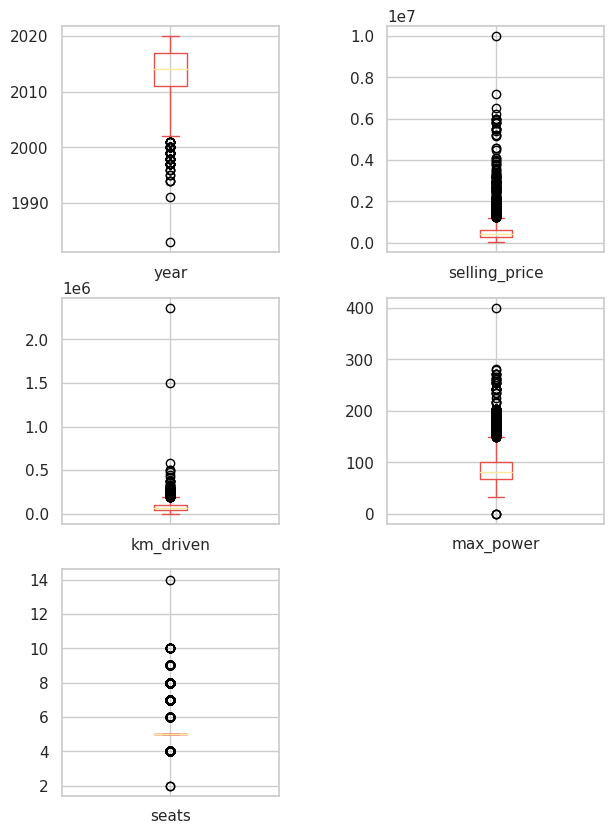

In [88]:
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.plot(kind='box', subplots=True, layout=(3, 2), figsize=(7, 10))
plt.subplots_adjust(wspace=0.5);
plt.show()

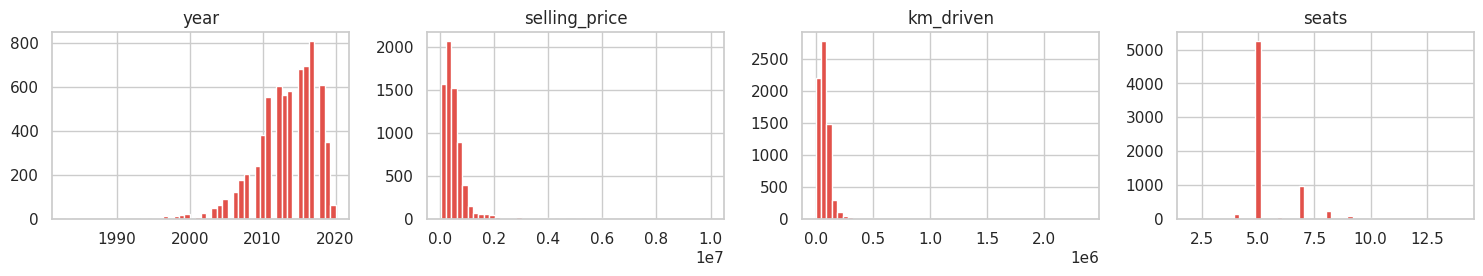

In [46]:
numeric = df_to_plot.columns
plt.figure(figsize=(15,10))

df.hist(bins=50, ax= plt.gca(), layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

In [89]:
df = df.loc[df['max_power'] <= 300.00]
df = df.loc[df['km_driven'] <= 500000]

# data insight

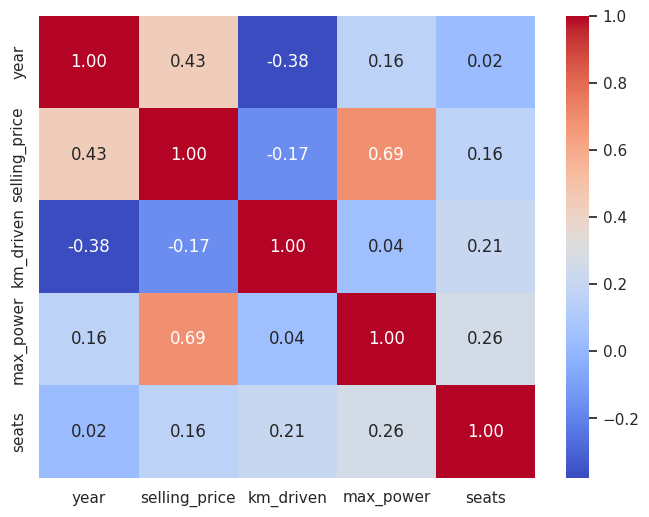

In [90]:
fig = plt.figure(figsize=(8, 6))
sns.heatmap(df_to_plot.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [92]:
ss = StandardScaler().fit_transform(df['selling_price'].to_numpy().reshape(-1,1))
ss_df = pd.DataFrame(ss, columns=['selling_price_standard'])
scaled = pd.concat([df, ss_df], axis=1)
scaled.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,selling_price_standard
0,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,1498 CC,103.52,5.0,-0.303432
1,Honda City 2017-2020 EXi,2006.0,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,1497 CC,78.00,5.0,-0.718569
2,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,1396 CC,90.00,5.0,-0.587370
3,Maruti Swift VXI BSIII,2007.0,130000.0,120000.0,Petrol,Individual,Manual,First Owner,1298 CC,88.20,5.0,-0.773398
4,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,1197 CC,81.86,5.0,-0.166359


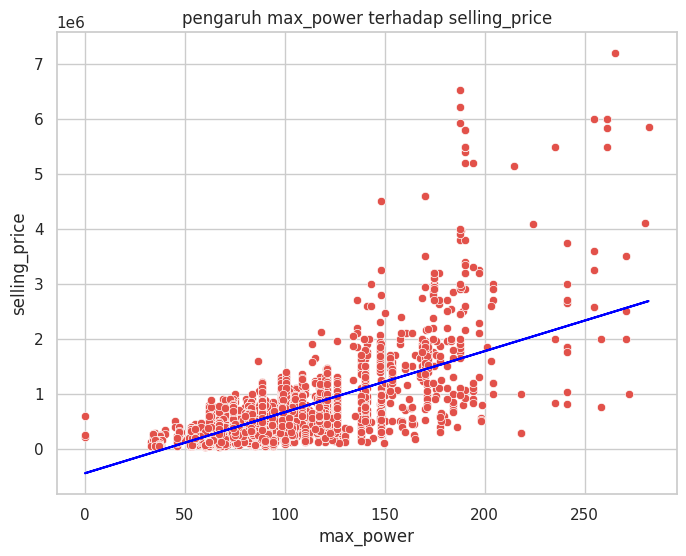

In [100]:
x = df['max_power'].to_numpy().reshape(-1, 1)
y = df['selling_price']
linear = LinearRegression().fit(x,y)


plt.figure(figsize=(8, 6))
plt.plot(x, linear.predict(x), color = 'blue')
sns.scatterplot(x=df['max_power'], y=df['selling_price'])
plt.title('pengaruh max_power terhadap selling_price')
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

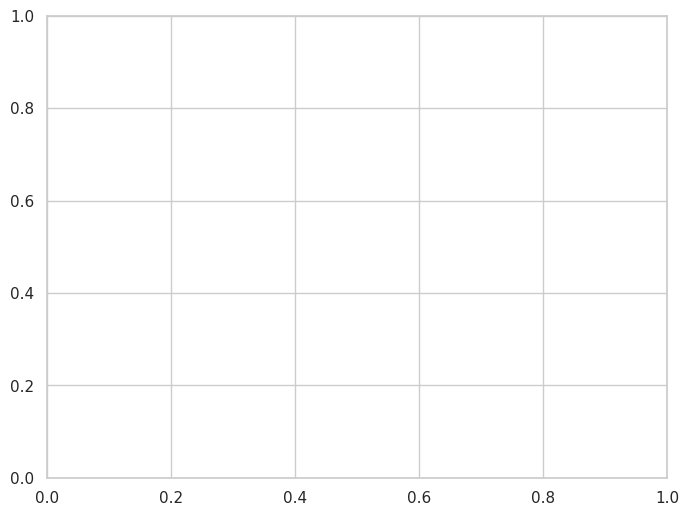

In [125]:
x = df['engine'].to_numpy().reshape(-1, 1)
y = df['max_power']
linear = LinearRegression().fit(x,y)

plt.figure(figsize=(8, 6))
plt.plot(x, linear.predict(x), color = 'blue')
sns.scatterplot(y=df['max_power'], x=df['engine'])
plt.title('pengaruh max_power terhadap engine')
plt.show()

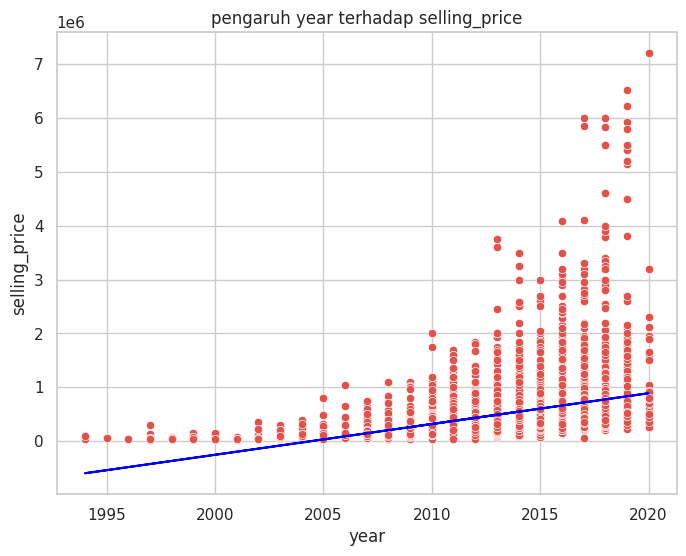

In [120]:
x = df['year'].to_numpy().reshape(-1,1)
y = df['selling_price']
linear.fit(x,y)

plt.figure(figsize=(8, 6))
plt.plot(x, linear.predict(x), color = 'blue')
sns.scatterplot(x=df['year'], y=df['selling_price'])
plt.title('pengaruh year terhadap selling_price')
plt.show()

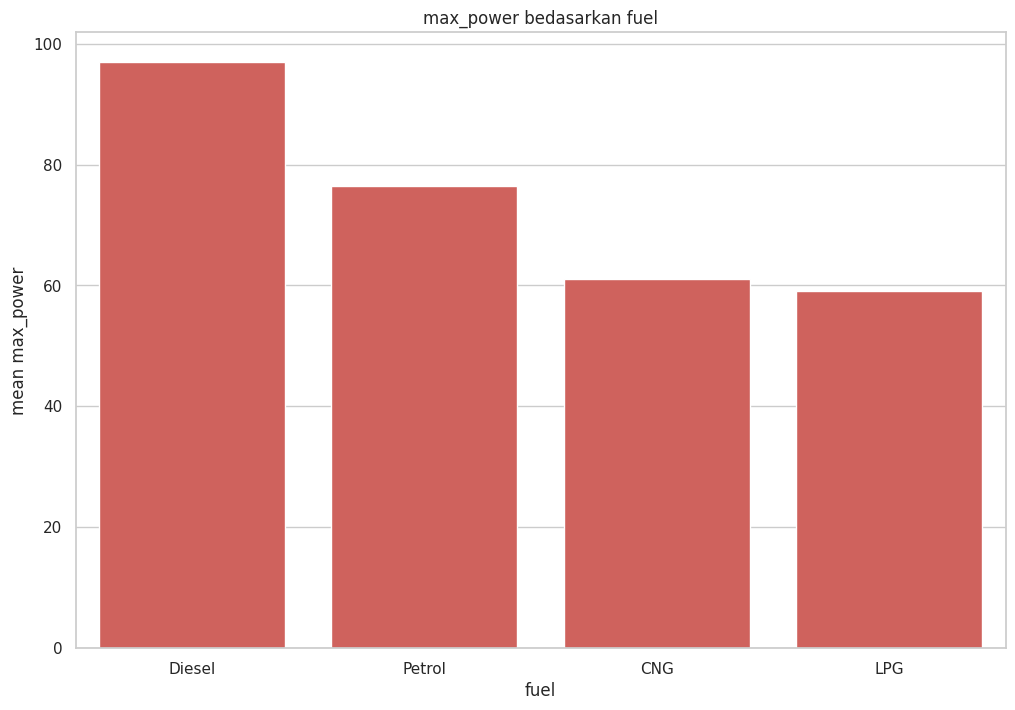

In [121]:
fuel_max_power = df.groupby('fuel')['max_power'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=fuel_max_power.index, y=fuel_max_power.values)
plt.title('max_power bedasarkan fuel')
plt.ylabel('mean max_power')
plt.show()

In [123]:
from sklearn.preprocessing import StandardScaler
# Membuat DataFrame baru dari kolom yang diubah skala
ss = StandardScaler().fit_transform(df['year'].to_numpy().reshape(-1,1))

ss_df = pd.DataFrame(ss, columns=['year_scaled'])

# Menambahkan DataFrame baru ke DataFrame asli
scaled = pd.concat([df, ss_df], axis=1)

# Menampilkan DataFrame baru
scaled.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,year_scaled
0,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,1498,103.0,5.0,0.099472
1,Honda City 2017-2020 EXi,2006.0,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,1497,78.0,5.0,-1.953280
2,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,1396,90.0,5.0,-0.926904
3,Maruti Swift VXI BSIII,2007.0,130000.0,120000.0,Petrol,Individual,Manual,First Owner,1298,88.0,5.0,-1.696686
4,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,1197,81.0,5.0,0.869254


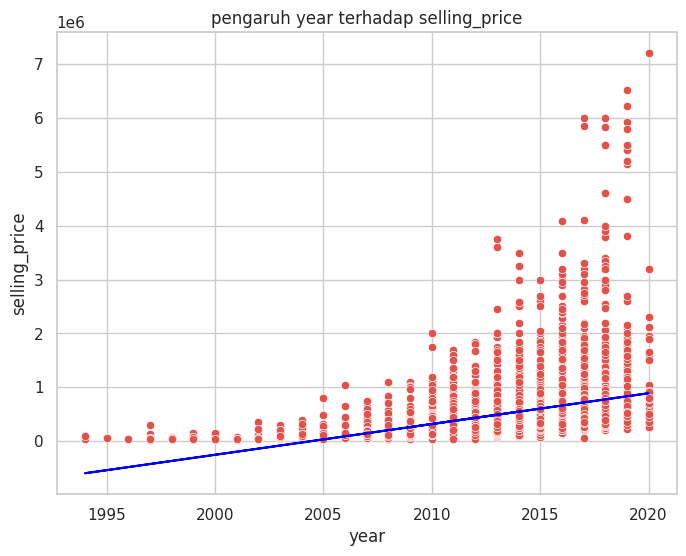

In [124]:
x = df['year'].to_numpy().reshape(-1,1)
y = df['selling_price']
linear.fit(x,y)

plt.figure(figsize=(8, 6))
plt.plot(x, linear.predict(x), color = 'blue')
sns.scatterplot(x=df['year'], y=df['selling_price'])
plt.title('pengaruh year terhadap selling_price')
plt.show()